In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import os
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode']= True
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
import matplotlib.pyplot as plt

/Users/ragz/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
global_palette = "tab10"#["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"][:5]
ROOT = "./outputs"
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph", "prm_common_seed": "PRM Common Seed"}
algorithm_names = {"prm_common_seed": "PRM Common Seed"}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph"}
scenario = "fetch1"

### Graph Size Comparisons

In [3]:
df = pd.read_csv("{}/graph_size_data.csv".format(ROOT))
df['num_lambdas-num_samples'] = list(zip(df.num_lambdas, df.num_samples))
df = df[df["scenario"] == scenario]
df = df[df["algorithm"].isin(algorithm_names.keys())]
df

,Unnamed: 0,algorithm,max_global_samples,num_edges,num_lambdas,num_samples,num_vertices,scenario,time_limit,total_size,num_lambdas-num_samples
0,0,prm_common_seed,26422,354238,8,1,11684,fetch1,60.0,365922,"(8, 1)"
1,1,prm_common_seed,25459,335040,8,1,11180,fetch1,57.0,346220,"(8, 1)"
2,2,prm_common_seed,24438,315802,8,1,10718,fetch1,54.0,326520,"(8, 1)"
3,3,prm_common_seed,23441,296838,8,1,10224,fetch1,51.0,307062,"(8, 1)"
4,4,prm_common_seed,22273,277908,8,1,9784,fetch1,48.0,287692,"(8, 1)"
5,5,prm_common_seed,21180,259026,8,1,9304,fetch1,45.0,268330,"(8, 1)"
6,6,prm_common_seed,20051,240328,8,1,8864,fetch1,42.0,249192,"(8, 1)"
7,7,prm_common_seed,18935,221596,8,1,8400,fetch1,39.0,229996,"(8, 1)"
8,8,prm_common_seed,17667,203000,8,1,7880,fetch1,36.0,210880,"(8, 1)"
9,9,prm_common_seed,16493,184786,8,1,7328,fetch1,33.0,192114,"(8, 1)"


In [4]:
print(sorted(df['num_lambdas-num_samples'].unique()))

[(1, 1), (4, 1), (8, 1), (32, 1), (64, 1), (64, 5), (64, 10), (64, 100), (128, 1), (128, 5), (128, 10), (128, 100)]


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    print(df.groupby(['num_lambdas-num_samples', 'time_limit']).nunique()[['Unnamed: 0']]) # unnamed 0 is the count, use this to decide which to plot
# curr_df = df.groupby(['num_lambdas-num_samples', 'time_limit']).nunique()

                                    Unnamed: 0
num_lambdas-num_samples time_limit            
(1, 1)                  3.0                 20
                        6.0                 20
                        9.0                 20
                        12.0                20
                        15.0                20
                        18.0                20
                        21.0                20
                        24.0                20
                        27.0                20
                        30.0                20
                        33.0                20
                        36.0                20
                        39.0                20
                        42.0                20
                        45.0                20
                        48.0                20
                        51.0                20
                        54.0                20
                        57.0                20
             

In [6]:
# plot_pairs = sorted([(1, 1), (4, 1), (8, 1), (32, 1), (64, 1), (64, 10), (32, 10), (8,10), (4,10), (1,10)])
# plot_pairs = sorted([(1, 1), (4,1), (8, 1), (32, 1), (64, 10), (128, 100)])
plot_pairs = sorted([(32, 1), (64, 1), (64 , 10), (128, 1), (128, 100)])
# plot_pairs = sorted([(64, 1), (64, 10), (32, 10), (32, 1)])
# plot_pairs = sorted([(64, 10), (64, 20), (32, 1),  (128, 10), (128, 20)])
plot_pairs_id = "-".join("{}_{}".format(first, second) for first, second in plot_pairs)
SAVE_ROOT = "{}/{}/{}/{}".format(ROOT, scenario, ",".join(sorted(algorithm_names.keys())), plot_pairs_id) #ROOT + "/" + plot_pairs_id
print(plot_pairs_id)

32_1-64_1-64_10-128_1-128_100


In [7]:
os.makedirs(SAVE_ROOT)

FileExistsError: [Errno 17] File exists: './outputs/fetch1/prm_common_seed/32_1-64_1-64_10-128_1-128_100'

In [8]:
df = df[df['num_lambdas-num_samples'].isin(plot_pairs)]

In [9]:
def label_sort_fn(x):
    try:
        return int(x[1])
    except Exception:
        return 0

/Users/ragz/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


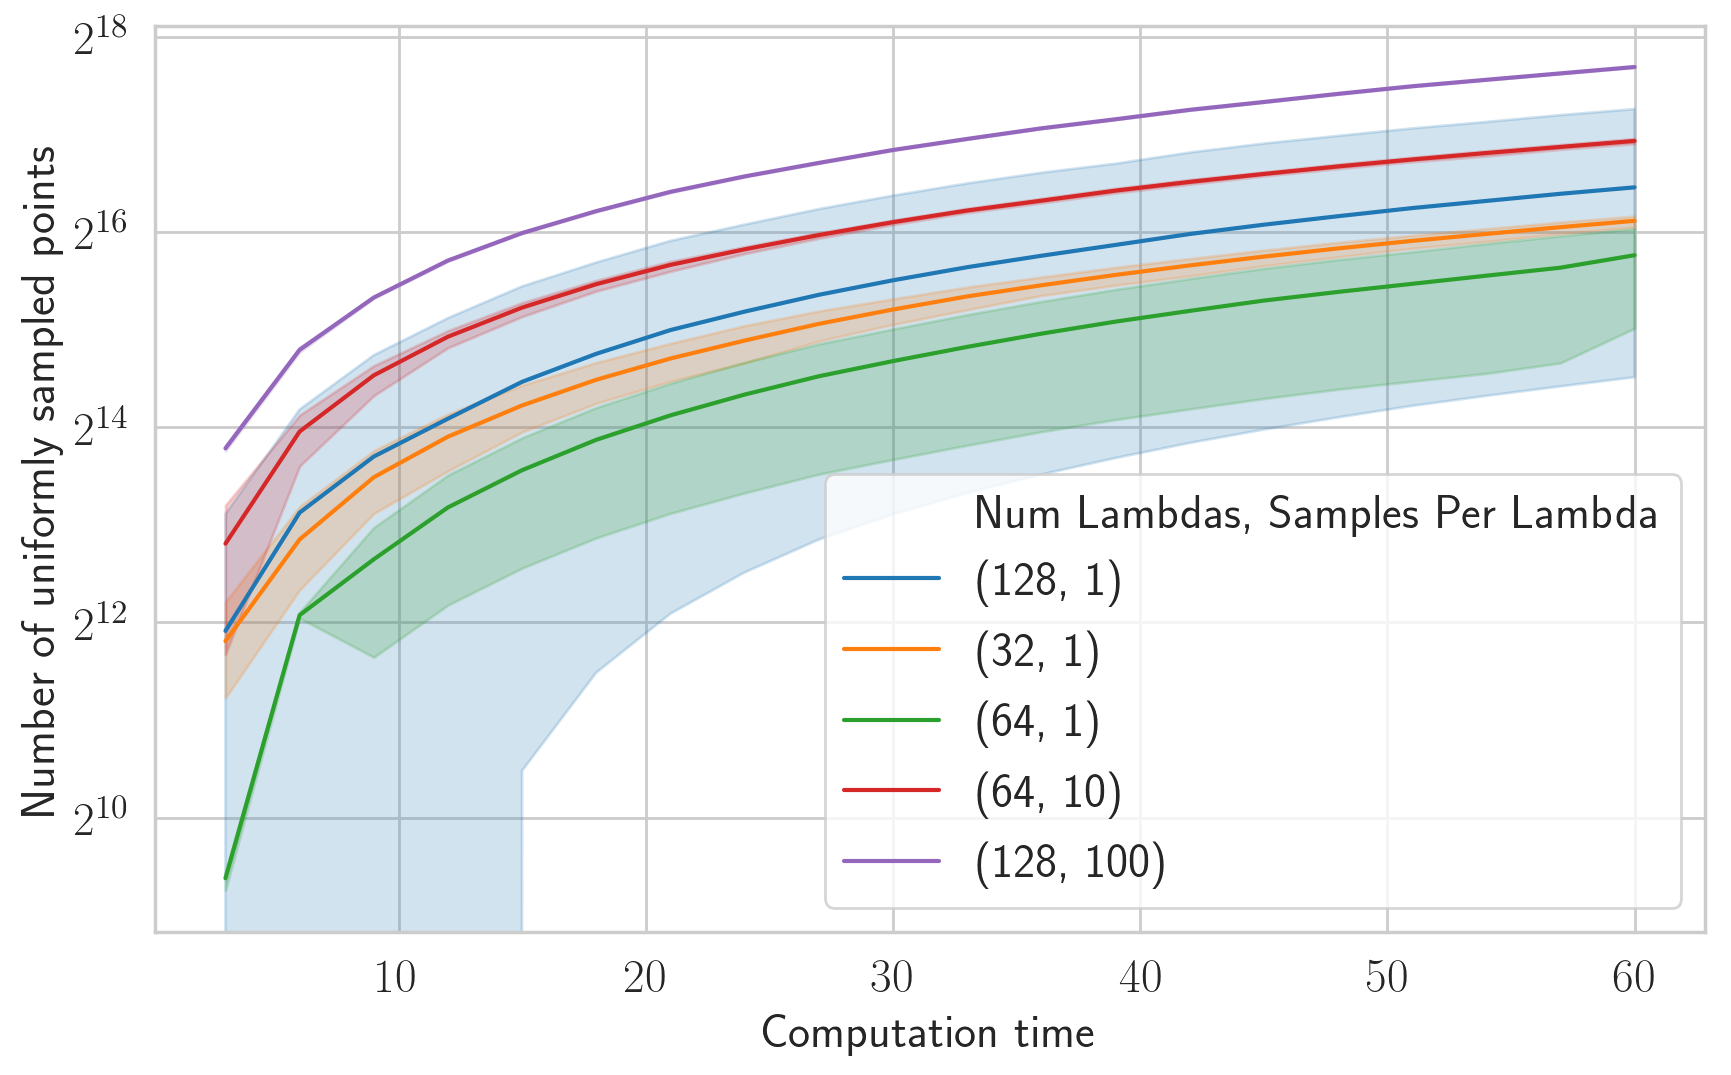

In [13]:
 sns.set(style="whitegrid")
g = sns.lineplot(data=df, x="time_limit", y="max_global_samples", 
                 hue="num_lambdas-num_samples", 
#                  style="algorithm", 
                 estimator=np.mean, legend="full",
                 palette=global_palette
                )
ax = g.axes
fontsize = 17
ax.set_ylabel("Number of uniformly sampled points", fontsize=fontsize)
ax.set_xlabel("Computation time", fontsize=fontsize)
# import ipdb; ipdb.set_trace()
handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
#     if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas, Samples Per Lambda"
    if label == "num_lambdas-num_samples": 
#         labels[i] = "Num Lambdas"
        labels[i] = "Num Lambdas, Samples Per Lambda"
    elif label == "algorithm": 
        labels[i] = "Algorithm"
    elif label in algorithm_names: 
        labels[i] = algorithm_names[label]
    else:
        pass
#         labels[i] = labels[i].split(",")[0][1:]
handles, labels = zip(*sorted(zip(handles, labels), key=label_sort_fn))
ax.legend(handles, labels, fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
g.set_yscale("log", basey=2)

plt.savefig("{}/max_global_samples_{}.pdf".format(SAVE_ROOT, plot_pairs_id))
plt.show()

/Users/ragz/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


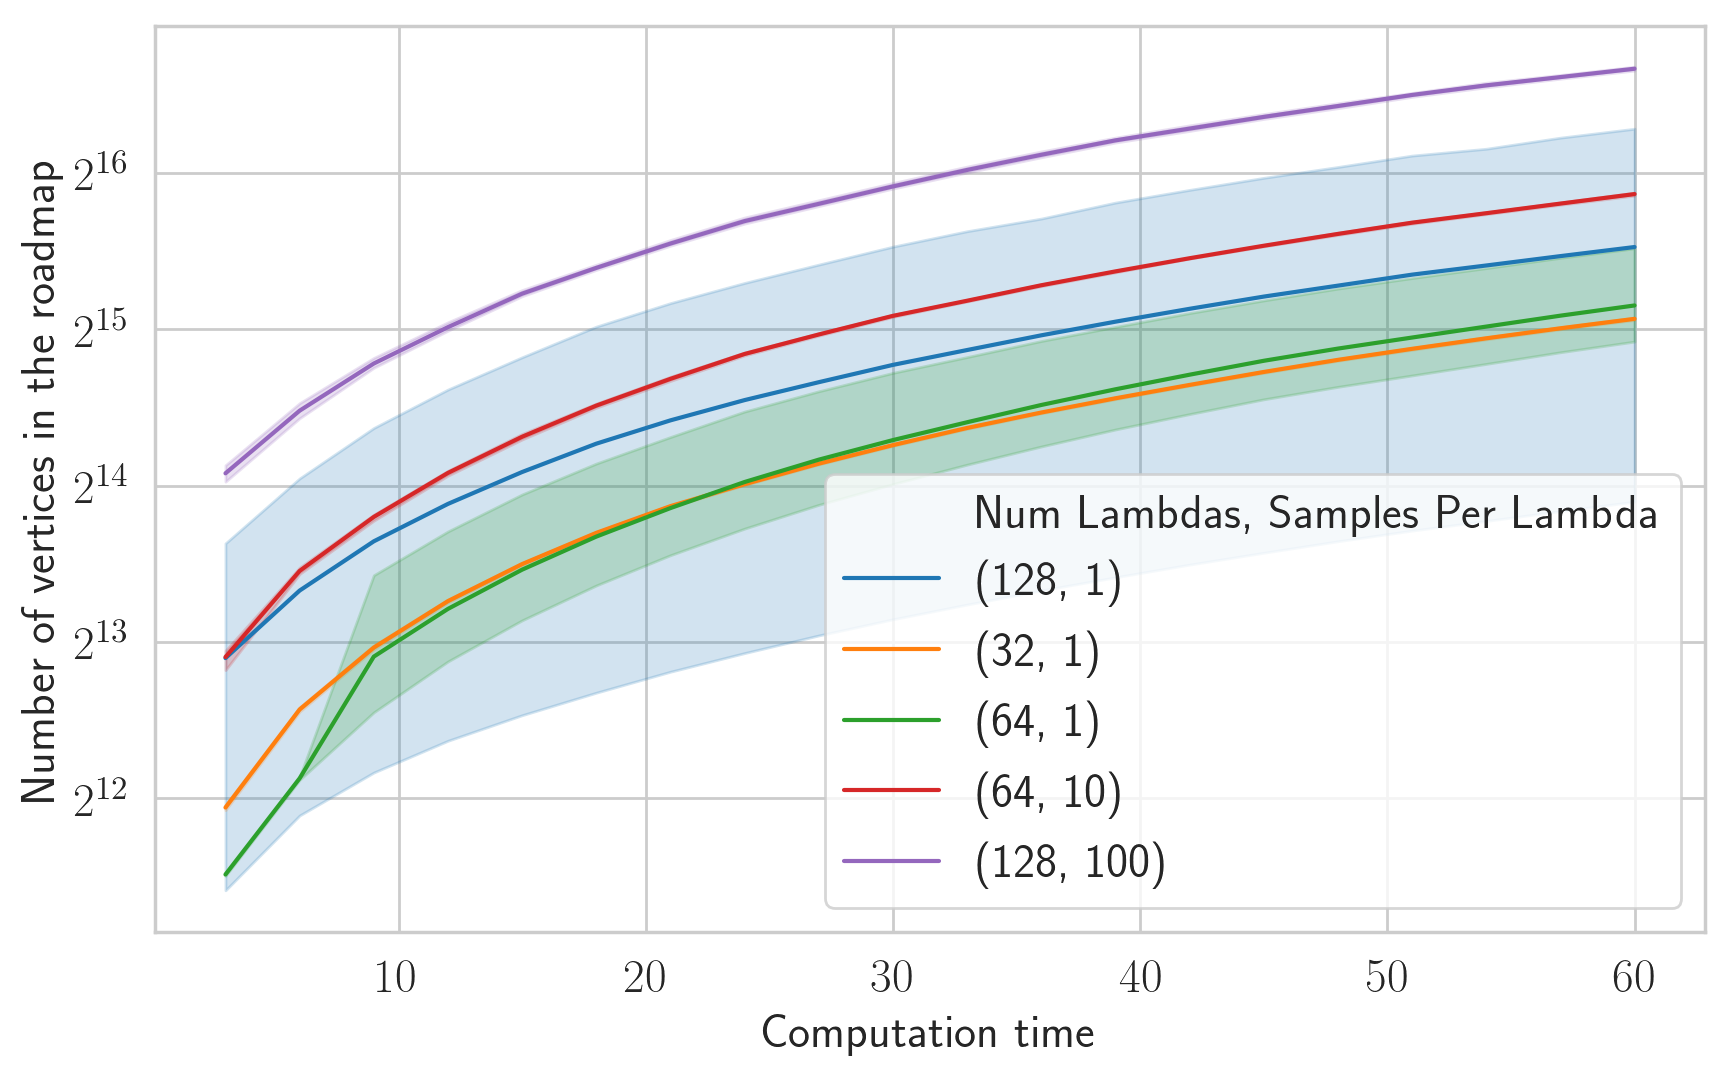

In [14]:
plt.figure(figsize=(10, 6), dpi=200)
sns.set(style="whitegrid")
g = sns.lineplot(data=df, x="time_limit", y="num_vertices", 
                 hue="num_lambdas-num_samples", estimator=np.mean, legend="full", 
                 
#                  style="algorithm",
                 palette=global_palette
                )
ax = g.axes
ax.set_ylabel("Number of vertices in the roadmap", fontsize=fontsize)
ax.set_xlabel("Computation time", fontsize=fontsize)
handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
#     if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas, Samples Per Lambda"
    if label == "num_lambdas-num_samples": 
        labels[i] = "Num Lambdas, Samples Per Lambda"
#         labels[i] = "Num Lambdas"
    elif label == "algorithm": 
        labels[i] = "Algorithm"
    elif label in algorithm_names: 
        labels[i] = algorithm_names[label]
    else:
        pass
#         labels[i] = labels[i].split(",")[0][1:]
handles, labels = zip(*sorted(zip(handles, labels), key=label_sort_fn))
ax.legend(handles, labels, fontsize=fontsize, )
ax.tick_params(labelsize=fontsize)
g.set_yscale("log", basey=2)
plt.savefig("{}/num_vertices_{}.pdf".format(SAVE_ROOT, plot_pairs_id))
plt.show()

/Users/ragz/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


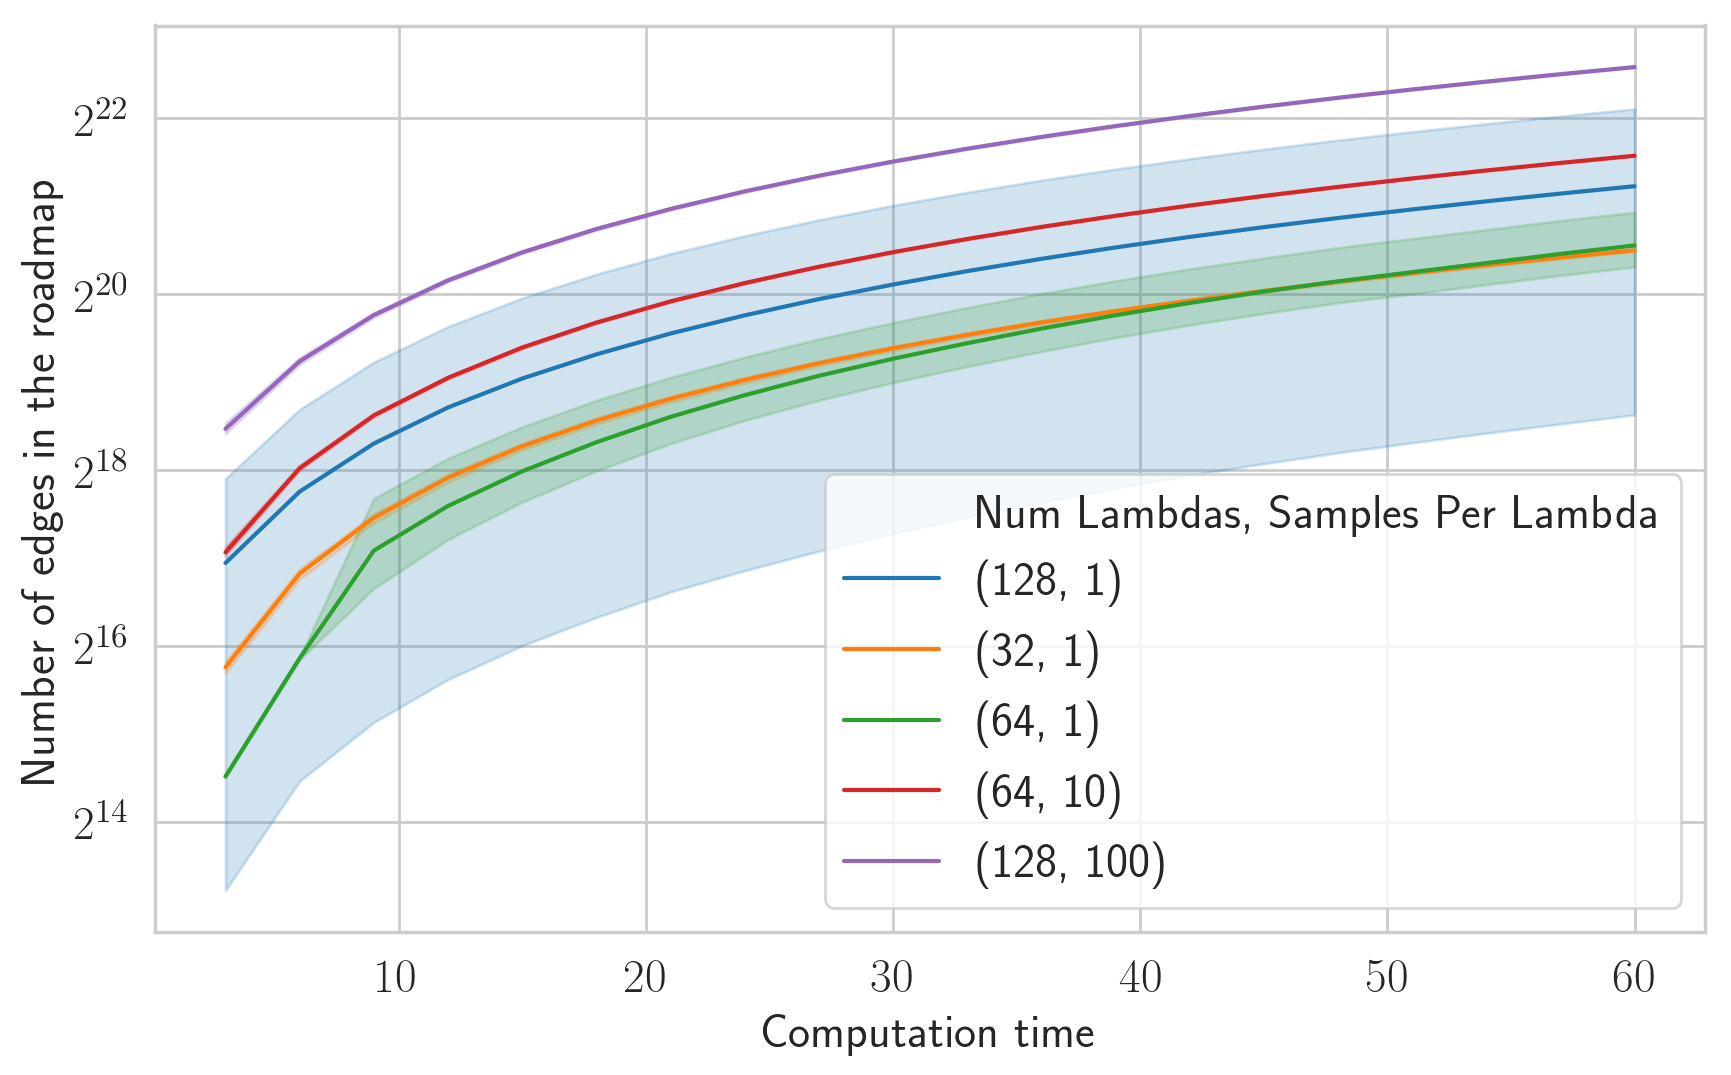

In [16]:
plt.figure(figsize=(10, 6), dpi=200)
sns.set(style="whitegrid")
g = sns.lineplot(data=df, x="time_limit", y="num_edges", 
                 hue="num_lambdas-num_samples", estimator=np.mean, legend="full", 
#                  style="algorithm",
                 palette=global_palette
                )
ax = g.axes
ax.set_ylabel("Number of edges in the roadmap", fontsize=fontsize)
ax.set_xlabel("Computation time", fontsize=fontsize)
handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
#     if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas, Samples Per Lambda"
    if label == "num_lambdas-num_samples": 
        labels[i] = "Num Lambdas, Samples Per Lambda"
#         labels[i] = "Num Lambdas"
    elif label == "algorithm": 
        labels[i] = "Algorithm"
    elif label in algorithm_names: 
        labels[i] = algorithm_names[label]
    else:
        pass
#         labels[i] = labels[i].split(",")[0][1:]
handles, labels = zip(*sorted(zip(handles, labels), key=label_sort_fn))
ax.legend(handles, labels, fontsize=fontsize, )
ax.tick_params(labelsize=fontsize)
g.set_yscale("log", basey=2)

plt.savefig("{}/num_edges_{}.pdf".format(SAVE_ROOT, plot_pairs_id))
plt.show()

##### Compute Metrics

In [143]:
df.keys()

Index(['Unnamed: 0', 'algorithm', 'max_global_samples', 'num_edges',
       'num_lambdas', 'num_samples', 'num_vertices', 'scenario', 'time_limit',
       'total_size', 'num_lambdas-num_samples'],
      dtype='object')

In [144]:
TIME_LIMIT = 60.0
graph_size_metrics_data = {
    "num_lambdas": [],
    "num_vertices": [],
    "num_edges": [],
    "max_global_samples": [],
    }
for value in plot_pairs:
    curr_df = df[
        np.bitwise_and(
                        df["num_lambdas-num_samples"] == value, 
                        df["time_limit"] == TIME_LIMIT
                      )]
    graph_size_metrics_data["num_lambdas"].append(value[0])
    graph_size_metrics_data["num_vertices"].append(np.mean(curr_df["num_vertices"]))
    graph_size_metrics_data["num_edges"].append(np.mean(curr_df["num_edges"]))
    graph_size_metrics_data["max_global_samples"].append(np.mean(curr_df["max_global_samples"]))
graph_size_metrics_df = pd.DataFrame(graph_size_metrics_data)
min_lambdas_row = graph_size_metrics_df[graph_size_metrics_df["num_lambdas"] == np.min(graph_size_metrics_data["num_lambdas"])]
print(graph_size_metrics_df)

   max_global_samples  num_edges  num_lambdas  num_vertices
0             5504.95    38852.2            1       2382.65
1            15564.10   170972.6            4       6966.40
2            26479.30   356317.1            8      11750.40
3            70881.45  1483444.8           32      34296.55
4           124972.50  3125354.5           64      59623.00
5           211240.00  6285119.2          128     103909.60


In [145]:
print("Num Lambdas & Num Samples Scaling & Vertices Scaling & Edges Scaling \\\\")
for i, row in graph_size_metrics_df.iterrows():
    row["num_lambdas"] = int(row["num_lambdas"])
    print("{:.0f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(
        row["num_lambdas"],
        row["max_global_samples"] /  min_lambdas_row["max_global_samples"].values[0] / row["num_lambdas"],
         row["num_vertices"] / min_lambdas_row["num_vertices"].values[0]/ row["num_lambdas"],
        row["num_edges"] /  min_lambdas_row["num_edges"].values[0]/ row["num_lambdas"]
    ))
#     print(row["num_edges"] / min_lambdas_row["num_edges"].values[0] / row["num_lambdas"])


Num Lambdas & Num Samples Scaling & Vertices Scaling & Edges Scaling \\
1 & 1.00 & 1.00 & 1.00 \\
4 & 0.71 & 0.73 & 1.10 \\
8 & 0.60 & 0.62 & 1.15 \\
32 & 0.40 & 0.45 & 1.19 \\
64 & 0.35 & 0.39 & 1.26 \\
128 & 0.30 & 0.34 & 1.26 \\


### Start end comparisons

In [146]:
path_length_df = pd.read_csv("{}/path_length_data.csv".format(ROOT))
# path_length_df = path_length_df.groupby(['start', 'goal', 'time_limit', 'num_lambdas', 'num_samples'], as_index=False).agg({'distance': ['min']})
# path_length_df.columns = ['start', 'goal', 'time_limit', 'num_lambdas', 'num_samples', 'distance']
# path_length_df = path_length_df.sort_values(by=["time_limit", "start", "goal",  "distance", "num_lambdas"])
path_length_df['num_lambdas-num_samples'] = list(zip(path_length_df.num_lambdas, path_length_df.num_samples))
path_length_df = path_length_df[path_length_df['num_lambdas-num_samples'].isin(plot_pairs)]
path_length_df = path_length_df[path_length_df["scenario"] == scenario]
path_length_df = path_length_df[path_length_df["algorithm"].isin(algorithm_names.keys())]

path_length_df


,Unnamed: 0,algorithm,distance,goal,num_lambdas,num_samples,scenario,start,time_limit,num_lambdas-num_samples
0,0,prm_common_seed,16.6053,"0.283115208148956, 1.22028923034668, -0.648826...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
1,1,prm_common_seed,13.4766,"0.0983504801988602, 0.371139824390411, -0.0989...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
2,2,prm_common_seed,20.4476,"0.280426293611526, 0.207870095968246, -0.67702...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
3,3,prm_common_seed,16.7179,"0.346845000982285, 1.00893819332123, 0.0599395...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
4,4,prm_common_seed,14.6639,"0.268567472696304, 0.481422990560532, -0.11096...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
5,5,prm_common_seed,15.3312,"0.19839172065258, 0.934713244438171, -0.669023...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
6,6,prm_common_seed,15.9730,"0.346828371286392, 0.736882984638214, -0.73947...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
7,7,prm_common_seed,16.9547,"0.338340878486633, 0.818273425102234, -0.34039...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
8,8,prm_common_seed,15.4450,"0.168071642518044, 0.959626317024231, -0.27971...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"
9,9,prm_common_seed,17.5028,"0.156843602657318, 1.19895756244659, 0.8296977...",8,1,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",60.0,"(8, 1)"


In [147]:
for (j, ((start, goal), group)) in enumerate(path_length_df.groupby(['start', 'goal'])):
    printable_group = group.reset_index()[["time_limit", "num_lambdas-num_samples", "distance", "algorithm"]]
    print(j)
#     print(i, printable_group)
    plt.figure(figsize=(10, 6), dpi=200)
    sns.set(style="whitegrid")
    g = sns.lineplot(data=printable_group, x="time_limit", y="distance", 
                     hue="num_lambdas-num_samples", estimator=np.median, palette=global_palette,
#                      style="algorithm",
#                      err_style=None, 
                     ci=None,
                     legend="full", )
    ax = g.axes
    ax.set_ylabel("Cost", fontsize=fontsize)
    ax.set_xlabel("Computation time", fontsize=fontsize)
    handles, labels = ax.get_legend_handles_labels()
    for i, label in enumerate(labels):
        #     if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas, Samples Per Lambda"
#         print(label)
        if label == "num_lambdas-num_samples": 
            labels[i] = "Num Lambdas"
        elif label == "algorithm": 
            labels[i] = "Algorithm"
        elif label in algorithm_names: 
            labels[i] = algorithm_names[label]
        else:
            labels[i] = labels[i].split(",")[0][1:]
    handles, labels = zip(*sorted(zip(handles, labels), key=label_sort_fn))
    ax.legend(handles, labels, fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
#     ax.set_title(str(j))
#     plt.show(); break
    plt.savefig("{}/goal{}.pdf".format(SAVE_ROOT, j))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [127]:
SAVE_ROOT

'./outputs/fetch2/prm_common_seed/1_1-4_1-8_1-32_1-64_10-128_100'

In [128]:
!convert {SAVE_ROOT}/*.png {SAVE_ROOT}/out.pdf
!open {SAVE_ROOT}/out.pdf

In [158]:
path_length_metrics_data = {
    "num_lambdas": [],
    "path_cost_at_60": [],
    "path_cost_at_3": [],
    "time_to_get_to_best_cost_at_9": [],
    "time_to_get_to_best_cost_at_21": [],
    "time_to_get_to_best_cost_at_3": [],
    "algorithm": []
}

max_num_lambdas = np.max(graph_size_metrics_data["num_lambdas"])

for (j, ((start, goal), group)) in enumerate(path_length_df.groupby(['start', 'goal'])):
    printable_group = group.reset_index()[["time_limit", "num_lambdas", "distance", "algorithm"]]
    for algorithm in printable_group["algorithm"].unique():
        curr_group = printable_group[printable_group["algorithm"] == algorithm]
        curr_group = curr_group.groupby(['num_lambdas', 'time_limit']).agg({'distance': 'median',}).reset_index()
        
        curr_group_at_3 = curr_group[curr_group["time_limit"] == 3]
        best_cost_at_3 = np.min(curr_group_at_3["distance"])
        
        curr_group_at_9 = curr_group[curr_group["time_limit"] == 9]
        best_cost_at_9 = np.min(curr_group_at_9["distance"])
        
        curr_group_at_21 = curr_group[curr_group["time_limit"] == 21]
        best_cost_at_21 = np.min(curr_group_at_21["distance"])
        
        for num_lambdas, num_lambdas_group in curr_group.groupby('num_lambdas'):
#             print(num_lambdas_group)
            time_to_get_below_at_3, time_to_get_below_at_9, time_to_get_below_at_21 = None, None, None
            cost_at_3, cost_at_60 = None, None
#             print("new", num_lambdas)
#             print(best_cost_at_3, best_cost_at_9)
            for (_, (num_lambdas, time_limit, distance)) in num_lambdas_group.iterrows():
                if time_limit == 3.0:
                    cost_at_3 = distance
                if time_limit == 60.0:
                    cost_at_60 = distance
                if time_to_get_below_at_3 is None:
                    if distance <= best_cost_at_3: 
                        time_to_get_below_at_3 = time_limit / 3
                if time_to_get_below_at_9 is None:
                    if distance <= best_cost_at_9: 
                        time_to_get_below_at_9 = time_limit / 9
                if time_to_get_below_at_21 is None:
                    if distance <= best_cost_at_21:
                        time_to_get_below_at_21 = time_limit / 21

            if time_to_get_below_at_3 is None: 
                continue
                time_to_get_below_at_3 = float('inf') / 3
            if time_to_get_below_at_9 is None:
                continue
                time_to_get_below_at_9 = float('inf') / 9
            if time_to_get_below_at_21 is None:
                continue
                time_to_get_below_at_21 = float('inf') / 21
#             print(time_to_get_below_at_3, time_to_get_below_at_9, "times") 
            path_length_metrics_data["num_lambdas"].append(num_lambdas)
            path_length_metrics_data["path_cost_at_60"].append(cost_at_60)
            path_length_metrics_data["path_cost_at_3"].append(cost_at_3)
            path_length_metrics_data["time_to_get_to_best_cost_at_21"].append(time_to_get_below_at_21)
            path_length_metrics_data["time_to_get_to_best_cost_at_9"].append(time_to_get_below_at_9)
            path_length_metrics_data["time_to_get_to_best_cost_at_3"].append(time_to_get_below_at_3)
            path_length_metrics_data["algorithm"].append(algorithm)
#     break
        

In [159]:
path_length_metrics_df = pd.DataFrame(path_length_metrics_data)
path_length_metrics_df = path_length_metrics_df.groupby(["algorithm", "num_lambdas"]).agg({
    "path_cost_at_60": 'mean',
    "path_cost_at_3": 'mean',
    "time_to_get_to_best_cost_at_21": 'mean',
    "time_to_get_to_best_cost_at_9": 'mean',
    "time_to_get_to_best_cost_at_3": 'mean',
}).reset_index()
path_length_metrics_df["time_to_get_to_best_cost_at_3"] /= min(path_length_metrics_df["time_to_get_to_best_cost_at_3"])
path_length_metrics_df["time_to_get_to_best_cost_at_9"] /= min(path_length_metrics_df["time_to_get_to_best_cost_at_9"])
path_length_metrics_df["time_to_get_to_best_cost_at_21"] /= min(path_length_metrics_df["time_to_get_to_best_cost_at_21"])
path_length_metrics_df

,algorithm,num_lambdas,time_to_get_to_best_cost_at_9,time_to_get_to_best_cost_at_3,path_cost_at_3,path_cost_at_60,time_to_get_to_best_cost_at_21
0,prm_common_seed,1.0,8.292683,10.000000,42.978100,19.261700,3.777778
1,prm_common_seed,4.0,4.146341,5.000000,28.684100,17.287950,1.888889
2,prm_common_seed,8.0,4.268293,5.147059,23.761450,16.070200,1.944444
3,prm_common_seed,32.0,3.943089,2.156863,19.136217,14.421688,1.888889
4,prm_common_seed,64.0,2.284981,1.764706,16.811763,14.333059,1.672515
5,prm_common_seed,128.0,1.000000,1.000000,15.628105,14.301656,1.000000


In [155]:
print("Num Lambdas & Path Cost at 3s & Path Cost at 60s & $t_{\mathrm{to_best_at_3}}$ & $t_{\mathrm{to_best_at_21}}$ \\\\")
for i, row in path_length_metrics_df.iterrows():
    row["num_lambdas"] = int(row["num_lambdas"])
    print("{:.0f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(
        row["num_lambdas"],
        row["path_cost_at_3"],
                row["path_cost_at_60"],
                row["time_to_get_to_best_cost_at_3"],
                row["time_to_get_to_best_cost_at_9"],
    ))
#     print(row["num_edges"] / min_lambdas_row["num_edges"].values[0] / row["num_lambdas"])


Num Lambdas & Path Cost at 3s & Path Cost at 60s & $t_{\mathrm{to_best_at_3}}$ & $t_{\mathrm{to_best_at_21}}$ \\
1 & inf & 20.23 & 11.68 & 9.68 \\
4 & 27.72 & 17.16 & 10.41 & 9.17 \\
8 & 22.70 & 15.99 & 7.56 & 8.41 \\
32 & 19.52 & 15.07 & 2.68 & 4.32 \\
64 & 16.90 & 14.44 & 1.74 & 2.34 \\
128 & 15.63 & 14.30 & 1.00 & 1.00 \\


### Common Seed Work Distribution Plotting

In [160]:
WORK_DIST_ROOT = "./work_distribution_outputs/prm_common_seed/work_distribution_out.csv"
work_dist_df = pd.read_csv(WORK_DIST_ROOT)
work_dist_df = work_dist_df[work_dist_df["num_lambdas"] != 32]

In [164]:
columns = {
    "total_num_samples": "Number of Samples Per Lambda",
    "total_num_valid_samples": "Number of Valid Samples Per Lambda",
    "total_num_edges": "Number of Edges Per Lambda",
}
for column_name, human_readable in columns.items():
    plt.figure(figsize=(10, 6), dpi=200)
    sns.set(style="whitegrid")
    g = sns.barplot(x="num_lambdas", y=column_name, data=work_dist_df)
    ax = g.axes
    ax.set_ylabel(human_readable, fontsize=fontsize)
    ax.set_xlabel("Number of lambdas", fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)

    plt.savefig("{}/{}.pdf".format(os.path.dirname(WORK_DIST_ROOT), column_name))
#     grouped = work_dist.groupby("num_lambdas").agg({
#         column_name: ["min", "max", "mean", "std"]
#     })
#     print(grouped)

/Users/ragz/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/ragz/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ragz/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu